<a href="https://colab.research.google.com/github/tusharbansal22/Tensorflow-Notebooks/blob/main/Simple_RNN_sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [45]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

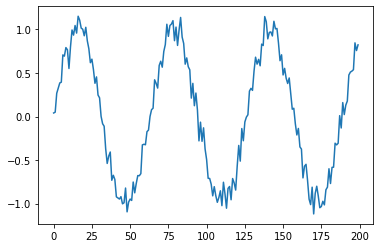

In [46]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

plt.plot(series)
plt.show()

In [47]:
T=10
D=1
X=[]
Y=[]
for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T,1)
Y=np.array(Y)
N=len(X)
print("X.shape: ",X.shape, " Y.shape ",Y.shape)

X.shape:  (190, 10, 1)  Y.shape  (190,)


In [48]:
i=Input(shape=(T,1))
x=SimpleRNN(5, activation='relu')(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.1))

r=model.fit(X[:N//2],Y[:-N//2],epochs=80,validation_data=(X[-N//2:],Y[-N//2:]))

Epoch 1/80


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 129ms/step - loss: 0.4566 - val_loss: 0.1898
Epoch 2/80
3/3 [==============================] - 0s 17ms/step - loss: 0.1330 - val_loss: 0.0658
Epoch 3/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0779 - val_loss: 0.1038
Epoch 4/80
3/3 [==============================] - 0s 29ms/step - loss: 0.1114 - val_loss: 0.0967
Epoch 5/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0956 - val_loss: 0.0539
Epoch 6/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0502 - val_loss: 0.0336
Epoch 7/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0375 - val_loss: 0.0561
Epoch 8/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0543 - val_loss: 0.0475
Epoch 9/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0388 - val_loss: 0.0346
Epoch 10/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0313 - val_loss: 0.0358
Epoch 11/80
3/3 [======================

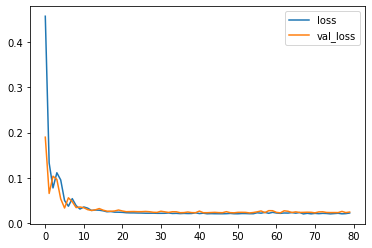

In [49]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [50]:
validation_target= Y[-N//2:]
validation_predictions=[]

i=-N//2

while(len(validation_predictions)<len(validation_target)):
  p=model.predict(X[i].reshape(1,-1,1))[0,0]
  i+=1
  validation_predictions.append(p)

1/1 [==============================] - 0s 29ms/step


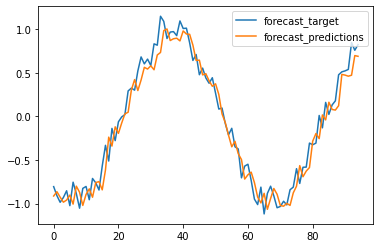

In [51]:
plt.plot(validation_target,label='forecast_target')
plt.plot(validation_predictions,label='forecast_predictions')
plt.legend()

In [52]:
validation_target= Y[-N//2:]
validation_predictions=[]

last_x=X[-N//2]

while(len(validation_predictions)<len(validation_target)):
  p=model.predict(last_x.reshape(1,-1,1))[0,0]
  validation_predictions.append(p)

  last_x=np.roll(last_x,-1)
  last_x[-1]=p

1/1 [==============================] - 0s 19ms/step


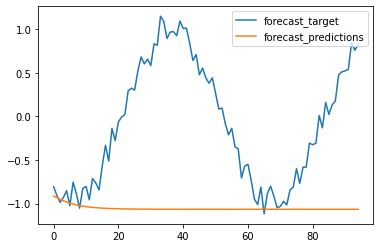

In [53]:
plt.plot(validation_target,label='forecast_target')
plt.plot(validation_predictions,label='forecast_predictions')
plt.legend()